In [77]:
# Procesamiento de datos
import pandas as pd
# Funciones algebráicas
import numpy as np
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
## Estilos
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
# Contador
from collections import Counter
# Métodos de iteración
from itertools import product
# Machine Learning
## Cross Validation
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
## Separación de datos de entrenamiento
from sklearn.model_selection import train_test_split
## Preprocesamiento de variables
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder, RobustScaler, MaxAbsScaler, QuantileTransformer, PowerTransformer
# Modelos de clasificacion
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

## Modelo de máquina de soporte vectorial
from sklearn.svm import SVC
## Clasificador de árbol de decisión
from sklearn.tree import DecisionTreeClassifier
## Clasificador de bosques aleatorios
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
## Naive Bayes
from sklearn.naive_bayes import GaussianNB
## Regresión Logística
from sklearn.linear_model import LogisticRegression
## Muestreado para balancear datos
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
## Métricas
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay, f1_score, make_scorer, precision_score, recall_score, log_loss
## Ajuste de hiperparámetros
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# módulo que proporciona soporte en tiempo de ejecución para sugerencias de tipo
from sklearn import datasets
from typing import Dict, Iterable, Any
# Desactivar los avisos
import warnings
warnings.filterwarnings('ignore')
# Importar los datos de yahoo
import yfinance as yf
# Librería para plotear mejor datos financieros
import cufflinks as cf
#cf.set_config_file(offline = True)

He intentado escoger acciones con poca correlación. La explicación de ellas es:

AAPL: Apple Inc., uno de los fabricantes más grandes de tecnología de consumo, conocido por productos como el iPhone, el iPad y las MacBooks.

RELIANCE.NS: Reliance Industries Limited, una conglomerado multinacional indio que tiene negocios en diversos sectores como energía, petroquímicos, textiles, recursos naturales, y telecomunicaciones. El sufijo ".NS" indica que la acción se negocia en la National Stock Exchange of India.

BHP.AX: BHP Group Limited (anteriormente BHP Billiton), una de las compañías mineras y de recursos más grandes del mundo. El sufijo ".AX" indica que la acción se negocia en la Australian Securities Exchange.

SAN.MC: Banco Santander, S.A., un banco multinacional español y una de las mayores instituciones bancarias de la zona euro. El sufijo ".MC" indica que la acción se negocia en la Bolsa de Madrid.

REP.MC: Repsol, S.A., una empresa energética y petroquímica española. Al igual que SAN.MC, el sufijo ".MC" indica que la acción se negocia en la Bolsa de Madrid.

IBE.MC: Iberdrola, S.A., una empresa española de energía, una de las mayores productoras de energía renovable. También cotiza en la Bolsa de Madrid.

TEF.MC: Telefónica, S.A., una compañía multinacional de telecomunicaciones con sede en España. También cotiza en la Bolsa de Madrid.

Acciones con las que trabajaré: 

["AAPL", "RELIANCE.NS", "BHP.AX", "SAN.MC", "REP.MC", "IBE.MC", "TEF.MC"]

In [78]:
df = pd.read_csv("acciones_preprocesado.csv")
# quito los que devuelve 0 la dirección ya que no me calcula bien las métricas de los modelos
df = df[df.direction != 0]
df = df.sort_values(by="date")
df.reset_index(inplace=True, drop=True)
df

,accion,date,price,returns,price_lag1,high_lag1,low_lag1,direction,lag1,lag2,...,roll_high,year,day_of_year,week_of_year,sin_month,cos_month,sin_day,cos_day,sin_day_of_week,cos_day_of_week
0,REP.MC,2010-10-20,8.323917,0.004088,8.289959,19.885000,19.420000,1.0,-0.017008,0.004541,...,20.530001,2010,293,42,-8.660254e-01,0.5,-0.790776,-0.612106,0.974928,-0.222521
1,IBE.MC,2010-10-20,3.034428,-0.001024,3.037537,5.907000,5.824000,-1.0,-0.001534,0.003755,...,5.907000,2010,293,42,-8.660254e-01,0.5,-0.790776,-0.612106,0.974928,-0.222521
2,SAN.MC,2010-10-20,4.175534,-0.000624,4.178143,9.111239,8.860599,-1.0,0.008142,0.006414,...,9.111239,2010,293,42,-8.660254e-01,0.5,-0.790776,-0.612106,0.974928,-0.222521
3,TEF.MC,2010-10-20,7.717547,-0.000258,7.719536,19.274195,19.056686,-1.0,-0.003860,0.001028,...,19.407665,2010,293,42,-8.660254e-01,0.5,-0.790776,-0.612106,0.974928,-0.222521
4,SAN.MC,2010-10-21,4.156858,-0.004483,4.175534,8.957142,8.790048,-1.0,-0.000624,0.008142,...,9.111239,2010,294,42,-8.660254e-01,0.5,-0.897805,-0.440394,0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16674,AAPL,2023-12-29,192.284637,-0.005439,193.333298,194.660004,193.169998,-1.0,0.002224,0.000518,...,199.619995,2023,363,52,-2.449294e-16,1.0,-0.394356,0.918958,-0.433884,-0.900969
16675,IBE.MC,2023-12-29,11.670105,0.003798,11.625863,11.910000,11.820000,1.0,-0.000845,-0.002110,...,12.015000,2023,363,52,-2.449294e-16,1.0,-0.394356,0.918958,-0.433884,-0.900969
16676,SAN.MC,2023-12-29,3.705476,-0.002114,3.713319,3.817500,3.775000,-1.0,-0.005923,0.000525,...,3.966500,2023,363,52,-2.449294e-16,1.0,-0.394356,0.918958,-0.433884,-0.900969
16677,REP.MC,2023-12-29,13.053245,-0.001486,13.072656,13.750000,13.465000,-1.0,-0.022753,0.010578,...,14.010000,2023,363,52,-2.449294e-16,1.0,-0.394356,0.918958,-0.433884,-0.900969


Lo primero que voy a hacer es transformar la fecha para poder meterla como variable numérica 

Ahora voy a separar los data frames en:
1.- variables categóricas para hacerle onehotencoding
2.- variables numéricas para aplicarle escaladores
3.- variables seno y cosenoidales que no se transforman ya más
4.- variable objetivo (dirección)

In [96]:
df_cat = df[["accion"]].copy()
columns_to_copy = [col for col in df.columns if col.startswith('sin') or col.startswith('cos')]
df_sincos = df[columns_to_copy].copy()
columns_to_exclude = columns_to_copy + ["accion", "direction", "date", "price", "returns"]
columns_to_select = [col for col in df.columns if col not in columns_to_exclude]
df_num = df[columns_to_select].copy()
df_dir = df[["direction"]].copy()

In [97]:
df_num

,price_lag1,high_lag1,lag1,lag2,lag3,lag4,lag5,sma200,sma_lower200,sma_upper200,ema_l,roll_high,year,day_of_year,week_of_year
0,8.289959,19.885000,-0.017008,0.004541,-0.003785,-0.006778,0.006023,7.438594,6.458718,8.418470,8.272826,20.530001,2010,293,42
1,3.037537,5.907000,-0.001534,0.003755,0.006519,0.000516,0.016845,2.912467,2.486591,3.338342,2.959894,5.907000,2010,293,42
2,4.178143,9.111239,0.008142,0.006414,0.007836,-0.006384,0.030827,4.051680,3.414417,4.688942,4.083700,9.111239,2010,293,42
3,7.719536,19.274195,-0.003860,0.001028,0.000000,0.005672,0.023014,6.726953,5.912897,7.541010,7.419078,19.407665,2010,293,42
4,4.175534,8.957142,-0.000624,0.008142,0.006414,0.007836,-0.006384,4.048097,3.421868,4.674325,4.090503,9.111239,2010,294,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16674,193.333298,194.660004,0.002224,0.000518,-0.002845,-0.005563,-0.000770,178.699130,156.798249,200.600011,192.080463,199.619995,2023,363,52
16675,11.625863,11.910000,-0.000845,-0.002110,0.006344,0.002124,-0.005512,10.910265,10.082776,11.737753,11.358391,12.015000,2023,363,52
16676,3.713319,3.817500,-0.005923,0.000525,0.003947,0.001055,-0.000923,3.337289,2.873884,3.800693,3.715193,3.966500,2023,363,52
16677,13.072656,13.750000,-0.022753,0.010578,0.001101,-0.005126,0.008804,13.331832,11.812746,14.850918,13.333067,14.010000,2023,363,52


Empiezo haciendo one hot encoding sobre la única variable tipo texto que tengo. El nombre de la acción

In [98]:
# drop_first para evitar la colinealidad
df_cat = pd.get_dummies(df_cat, columns=["accion"], drop_first = True).astype(int)
df_cat 


,accion_IBE.MC,accion_REP.MC,accion_SAN.MC,accion_TEF.MC
0,0,1,0,0
1,1,0,0,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
16674,0,0,0,0
16675,1,0,0,0
16676,0,0,1,0
16677,0,1,0,0


Ahora aplico escaladores sobre las variables numéricas

Ahora ya tengo el df de categóricas con onehotencoding y las numéricas con los datos escalados. Por tanto los quiero volver a unir y juntar también con las variables seno y cosenoidales. Y tener solo separada la variable objetivo

In [99]:
# por otra parte me guardo la variable objetivo en este dataframe y veo que está balanceado pero que tiene algunos 0, 
# no se bien que hacer con ellos. Significa que la diferencia de precio de un día a otro ha sido 0
df_dir.direction.value_counts()

direction
 1.0    8505
-1.0    8174
Name: count, dtype: int64

ENTRENAR EL MEJOR MODELO Y MEJOR ESCALADOR PARA VER TODAS LAS MÉTRICAS

In [108]:

cv = TimeSeriesSplit(n_splits=5)

# Diccionario de métricas de scoring
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# DataFrame para guardar los resultados finales
results = pd.DataFrame()
# Bucle para cada escalador
scaler = QuantileTransformer(output_distribution="normal")

# Aplicar el escalador a los datos
X_scaled = pd.DataFrame(scaler.fit_transform(df_num.copy()), columns = df_num.columns)  
df_variables = pd.concat([df_cat, df_sincos, X_scaled], axis=1)
model = LogisticRegression()
# Ejecutar cross_validate
cv_results = cross_validate(model, df_variables, df_dir, cv=cv, scoring=scoring)

# Guardar los resultados en el DataFrame
temp_df = pd.DataFrame({
    'Accuracy': cv_results['test_accuracy'],
    'Precision': cv_results['test_precision'],
    'Recall/Sensibility': cv_results['test_recall'],
    'F1-Score': cv_results['test_f1'],
    'ROC AUC': cv_results['test_roc_auc']
})

results = pd.concat([results, temp_df], ignore_index=True)

means = results.mean().to_frame().T

# Asignar el índice 'Mean' a la fila de promedios
means.index = ['Media']

# Concatenar la fila de promedios al DataFrame original
results = pd.concat([results, means], ignore_index=False)

# Mostrar el DataFrame con la fila de promedios añadida
print(model, scaler)
print(results)

LogisticRegression() QuantileTransformer(output_distribution='normal')
       Accuracy  Precision  Recall/Sensibility  F1-Score   ROC AUC
0      0.478230   0.519417            0.288799  0.371206  0.496826
1      0.514574   0.516997            0.770584  0.618819  0.524870
2      0.486146   0.492802            0.734621  0.589891  0.485299
3      0.482548   0.489846            0.707946  0.579040  0.471982
4      0.518892   0.522218            0.855756  0.648620  0.517893
Media  0.496078   0.508256            0.671541  0.561515  0.499374


OPTIMIZAR

# Suponiendo que df_num, df_cat, df_sincos, y df_dir ya están definidos
scaler = QuantileTransformer(output_distribution='normal')
X_scaled = pd.DataFrame(scaler.fit_transform(df_num.copy()), columns=df_num.columns)
df_variables = pd.concat([df_cat, df_sincos, X_scaled], axis=1)

# Definir el modelo LogisticRegression
model = LogisticRegression()

# Definir un conjunto moderado de hiperparámetros a optimizar
param_grid = {
    'penalty': ['l2'],  # Tipo de penalización
    'C': [0.01, 0.1, 1, 10, 100],  # Parámetro de regularización
    'solver': ['liblinear', 'sag', 'saga'],  # Algoritmo de optimización
    'max_iter': [500, 1000]  # Número máximo de iteraciones
}

# Definir la validación cruzada
cv = TimeSeriesSplit(n_splits=5)

# Crear el GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='accuracy', return_train_score=True, verbose=True)

# Ajustar el GridSearchCV a los datos
grid_search.fit(df_variables, df_dir)

# Obtener los mejores parámetros y puntuación
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Mejores hiperparámetros: {best_params}")
print(f"Mejor puntuación (accuracy): {best_score}")


ENTRENAR EL MODELO OPTIMIZADO  PARA VER LAS MÉTRICAS DESPUÉS DE OPTIMIZAR

In [113]:
# Configurar TimeSeriesSplit
cv = TimeSeriesSplit(n_splits=5)

# Diccionario de métricas de scoring
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# DataFrame para guardar los resultados finales
results = pd.DataFrame()
# Bucle para cada escalador
scaler = QuantileTransformer(output_distribution="normal")

# Aplicar el escalador a los datos
X_scaled = pd.DataFrame(scaler.fit_transform(df_num.copy()), columns=df_num.columns)
df_variables = pd.concat([df_cat, df_sincos, X_scaled], axis=1)
model = LogisticRegression(C=10, max_iter=500, penalty="l2", solver="sag")

# Listas para guardar predicciones y etiquetas verdaderas
all_y_true = []
all_y_pred = []

# Lista para guardar coeficientes de cada split
all_coefficients = []

# Ejecutar cross_validate y capturar predicciones
for train_index, test_index in cv.split(df_variables):
    X_train, X_test = df_variables.iloc[train_index], df_variables.iloc[test_index]
    y_train, y_test = df_dir.iloc[train_index], df_dir.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    all_y_true.extend(y_test.values.tolist())
    all_y_pred.extend(y_pred.tolist())

    # Guardar los coeficientes del modelo entrenado en este split
    all_coefficients.append(model.coef_[0])

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(all_y_true, all_y_pred)

# Mostrar la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

# Ejecutar cross_validate
cv_results = cross_validate(model, df_variables, df_dir, cv=cv, scoring=scoring, verbose=True)

# Guardar los resultados en el DataFrame
temp_df = pd.DataFrame({
    'Accuracy': cv_results['test_accuracy'],
    'Precision': cv_results['test_precision'],
    'Recall/Sensibility': cv_results['test_recall'],
    'F1-Score': cv_results['test_f1'],
    'ROC AUC': cv_results['test_roc_auc']
})

results = pd.concat([results, temp_df], ignore_index=True)

means = results.mean().to_frame().T

# Asignar el índice 'Mean' a la fila de promedios
means.index = ['Media']

# Concatenar la fila de promedios al DataFrame original
results = pd.concat([results, means], ignore_index=False)

# Mostrar el DataFrame con la fila de promedios añadida
print(model, scaler)
print(results)

# Convertir los coeficientes a un DataFrame
coef_df = pd.DataFrame(all_coefficients, columns=df_variables.columns)

# Promediar los coeficientes
coef_means = coef_df.mean()



Matriz de Confusión:
[[2204 4551]
 [2498 4642]]
LogisticRegression(C=10, max_iter=500, solver='sag') StandardScaler()
       Accuracy  Precision  Recall/Sensibility  F1-Score   ROC AUC
0      0.479669   0.518987            0.331984  0.404938  0.495151
1      0.508456   0.511138            0.888107  0.648843  0.536483
2      0.487945   0.494101            0.748927  0.595394  0.493409
3      0.477510   0.484915            0.632785  0.549068  0.467313
4      0.509896   0.521810            0.663662  0.584249  0.506040
Media  0.492695   0.506190            0.653093  0.556499  0.499679


COEFICIENTES

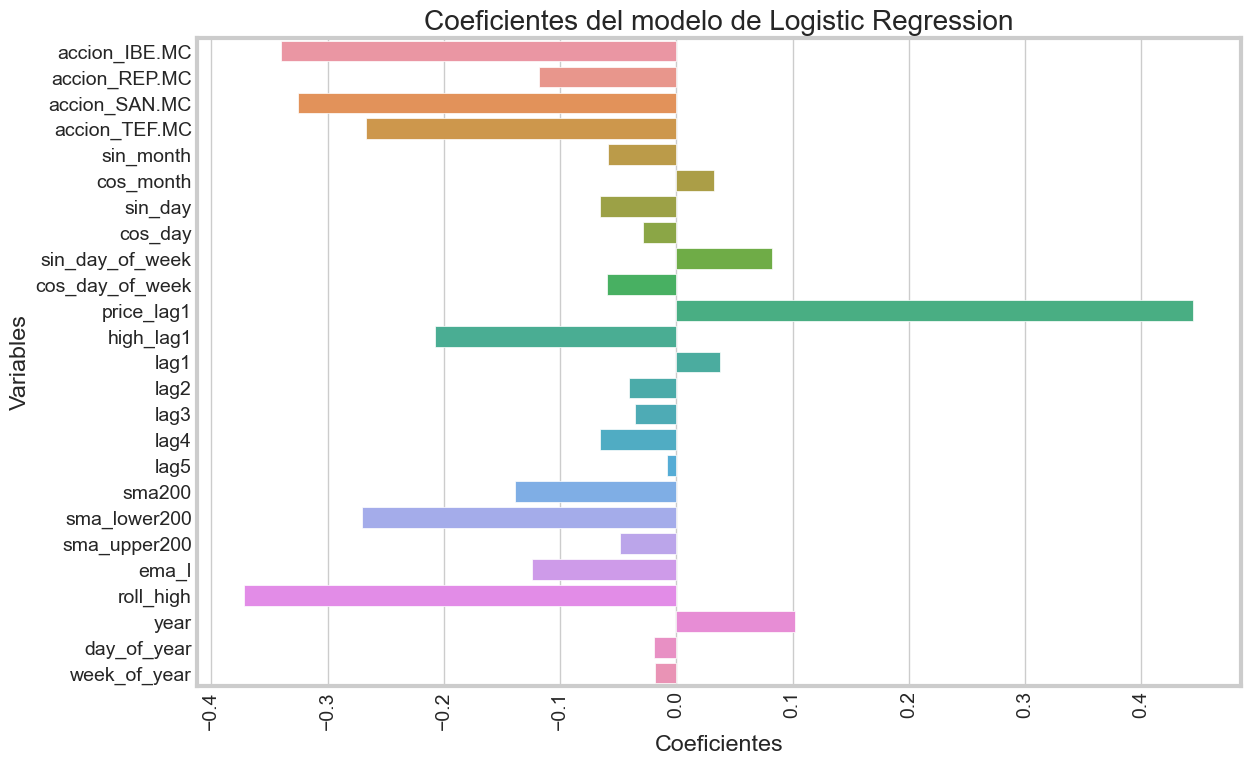

In [114]:
# Graficar los coeficientes
plt.figure(figsize=(12, 8))
sns.barplot(y=coef_means.index, x=coef_means.values)
plt.xticks(rotation=90)
plt.ylabel('Variables')
plt.xlabel('Coeficientes')
plt.title('Coeficientes del modelo de Logistic Regression')
plt.show()


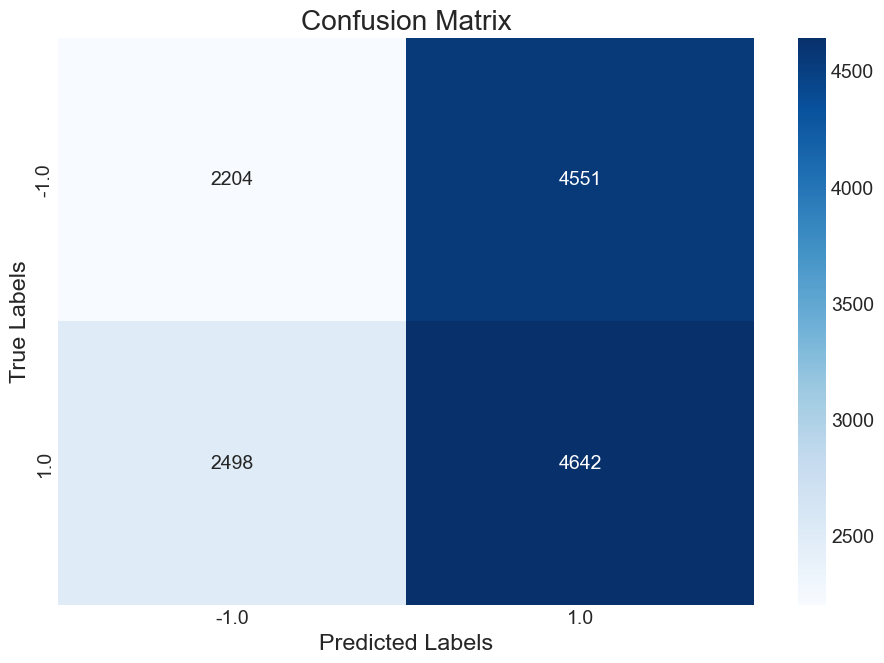

In [115]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()